In [2]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [3]:
dataset=pd.read_csv(r"C:\Users\wwrao\Downloads\value - real_estate_price_size_year_view_multi.csv")
dataset.head(10)

year       price    model
0  2015  234314.144   643.09
1  2009  228581.528   656.22
2  2018  281626.336   487.29
3  2015  401255.608  1504.75
4  2009  458674.256  1275.46
5  2006  245050.280   575.19
6  2015  265129.064   570.89
7  2006  175716.480   620.82
8  2018  331101.344   682.26
9  2009  218630.608   694.52

In [4]:
dataset.shape

(100, 3)

In [5]:
dataset.isnull().sum()

year     0
price    0
model    0
dtype: int64

C:\Users\wwrao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wwrao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wwrao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


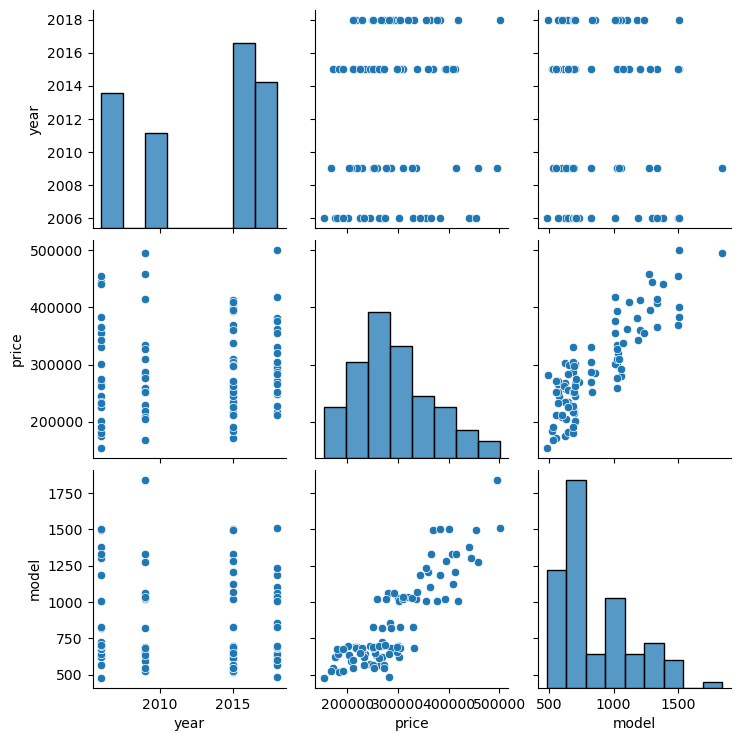

In [6]:
sns.pairplot(data=dataset)
plt.show()

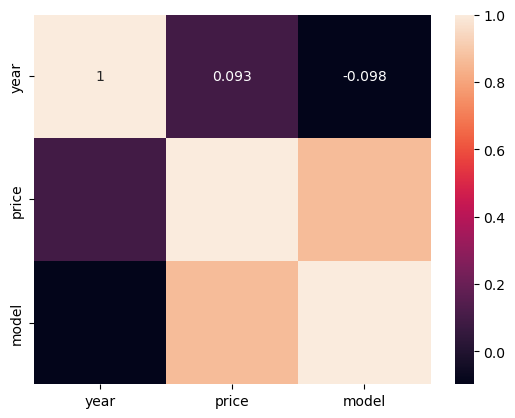

In [7]:
sns.heatmap(data=dataset.corr(),annot=True,)
plt.show()

In [8]:
x=dataset.iloc[:,:-1]
y=dataset["model"]

In [9]:
x

year       price
0   2015  234314.144
1   2009  228581.528
2   2018  281626.336
3   2015  401255.608
4   2009  458674.256
..   ...         ...
95  2009  252460.400
96  2009  310522.592
97  2006  383635.568
98  2015  225145.248
99  2006  274922.856

[100 rows x 2 columns]

In [10]:
y

0      643.09
1      656.22
2      487.29
3     1504.75
4     1275.46
       ...   
95     549.80
96    1037.44
97    1504.75
98     648.29
99     705.29
Name: model, Length: 100, dtype: float64

In [11]:
x.ndim

2

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)

In [14]:
x_train

year       price
60  2018  251188.824
5   2006  245050.280
70  2009  276875.632
71  2006  181587.576
19  2018  299416.976
..   ...         ...
87  2009  327252.112
1   2009  228581.528
69  2006  454512.760
55  2018  500681.128
46  2009  204302.976

[75 rows x 2 columns]

In [15]:
y_train

60     828.16
5      575.19
70    1021.95
71     643.41
19    1027.76
       ...   
87    1028.41
1      656.22
69    1496.36
55    1508.84
46     633.19
Name: model, Length: 75, dtype: float64

In [16]:
x_train.shape

(75, 2)

In [17]:
y_train.shape

(75,)

In [18]:
l=LinearRegression()

In [19]:
l.fit(x_train,y_train)


LinearRegression()

In [20]:
l.score(x_train,y_train)

0.7991706299028858

In [21]:
l.coef_


array([-9.48206093e+00,  3.50650073e-03])

In [22]:
l.intercept_

18918.32389852004

In [23]:
ab=l.predict(x)
ab

array([ 633.59384591,  670.38478928,  771.04789899, 1218.97421157,
       1477.20510837,  756.578663  ,  741.64638544,  513.45964257,
        944.53205074,  635.49188102,  849.12364277, 1603.80639157,
        567.52421886, 1251.88267469, 1454.86927794, 1440.87696548,
        654.32092185,  718.45556627,  687.85722374,  833.43079117,
        752.15191773,  414.37126329, 1258.64628397,  455.27195743,
        458.12134827, 1054.70060918,  736.56839314, 1238.59903019,
        856.06832926, 1105.82933532,  954.99557782,  687.85840192,
        597.31183871,  483.42006946,  783.66022108,  842.49139269,
        841.35056235,  716.05378158,  810.80769001,  673.68386514,
        899.14664451,  546.07743232,  876.45647935, 1322.94850273,
        811.08568539,  864.1369277 ,  585.25202893,  604.84454983,
        716.04665788,  732.15933732,  603.23447842, 1190.27052957,
        775.77435189,  842.39246995,  708.33496511, 1539.16368742,
        906.81674602, 1197.88782735, 1056.82926817,  693.26904

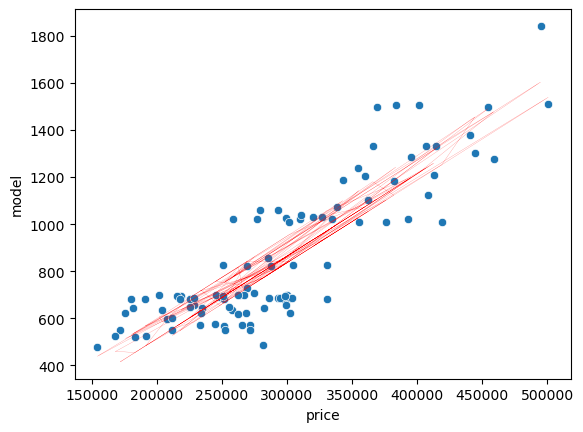

In [28]:
sns.scatterplot(x=dataset["price"], y=dataset["model"])
plt.plot(dataset["price"],ab,c='red',linewidth=0.1)
plt.show()